# Assignment 2: Milestone I Natural Language Processing
## Task 1. Basic Text Pre-processing
#### Student Name: Kriti Yadav
#### Student ID: s4109283


Environment: Python 3 and Jupyter notebook

Libraries used: 
* pandas
* re
* collections
* matplotlib.pyplot
* seaborn

## Introduction
Loading and Examining the data(EDA) before preprocessing.
## Task 1: Basic Text Pre-processing

In this task, we are cleaning and preparing a set of clothing reviews for further analysis in task 2 and 3. The main goal is to remove unnecessary noise from the data, making it easier to work with when building machine learning models later.

### Key Steps for Task 1 are as folllows:
1. **Tokenizing the Text**: Breaking each review into individual words (tokens) using a regular expression that handles words with hyphens (-) or apostrophes( ""). This is important so we can later analyze the words separately.

2. **Converting to Lowercase**: All words are being converted to lowercase to ensure consistency. This prevents the same word in different cases (e.g., "Great" and "great") from being treated as different words.

3. **Removing Stopwords**: We are removing common words like "and", "the", or "is" using a provided list. These words don’t carry useful information for our analysis and can be safely excluded.

4. **Filtering Rare and Frequent Words**:
   - **Rare Words**: Words that appear only once in the entire dataset are removed because they don’t add much value and can make the data noisier.
   - **Frequent Words**: The 20 most common words are also removed, as they appear too often to provide meaningful insight.

5. **Removing Short Words**: Words that are shorter than two characters are excluded because they usually don’t hold much meaning in this context.

6. **Building a Vocabulary**: After cleaning the text, we are creating a vocabulary of the remaining words. Each word is assigned an index, which helps in converting the text into a numerical format for later analysis.

### Output:
- **Processed Reviews**: The cleaned reviews are saved in `processed.csv`, with all the unwanted words removed.
- **Vocabulary File**: The vocabulary, sorted alphabetically and indexed, is saved as `vocab.txt`. This will be useful for converting text into numeric data for machine learning models.

The usecase of doing the above mentioned steps is to simplify and standardize the text data so that it’s easier to analyze and use for classification tasks 2 and 3.


## Importing libraries 

In [1]:
# Imporingt libraries needed in this assessment
import pandas as pd
import re                       #re for tokenizing the text based on the given regular expression.
from collections import Counter # Counter to count word frequencies.
import matplotlib.pyplot as plt
import seaborn as sns

### 1.1 Examining and loading data

- Loading the dataset into proper data structures and get it ready for processing.
- Examine the data and explaining the  findings

In [2]:
# Step 1: Loading Dataset
clothing = pd.read_csv('assignment3.csv')  # Replace with actual file path
reviews = clothing['Review Text']

In [3]:
# Basic statistics about the length of reviews
clothing['Review Length'] = reviews.apply(lambda x: len(str(x).split()))
print("\nStatistics about review lengths (number of words):")
print(clothing['Review Length'].describe())


Statistics about review lengths (number of words):
count    19662.000000
mean        62.115146
std         28.200497
min          2.000000
25%         38.000000
50%         62.000000
75%         90.000000
max        115.000000
Name: Review Length, dtype: float64


### Examining the dataset (EDA): 

In [4]:
# Display basic info about the dataset
print("Basic Information about the Dataset:")
clothing.info()

# Display the first few rows to understand the structure of the dataset
print("\nFirst few rows of the dataset:")
print(clothing.head())


Basic Information about the Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19662 entries, 0 to 19661
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              19662 non-null  int64 
 1   Age                      19662 non-null  int64 
 2   Title                    19662 non-null  object
 3   Review Text              19662 non-null  object
 4   Rating                   19662 non-null  int64 
 5   Recommended IND          19662 non-null  int64 
 6   Positive Feedback Count  19662 non-null  int64 
 7   Division Name            19662 non-null  object
 8   Department Name          19662 non-null  object
 9   Class Name               19662 non-null  object
 10  Review Length            19662 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 1.7+ MB

First few rows of the dataset:
   Clothing ID  Age                    Title  \
0         1077   60  Some major des

### **Main observations are as follows:**


Class Distribution of 'Recommended IND':
Recommended IND
1    16087
0     3575
Name: count, dtype: int64

Missing Data in Each Column:
Clothing ID                0
Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
Review Length              0
dtype: int64


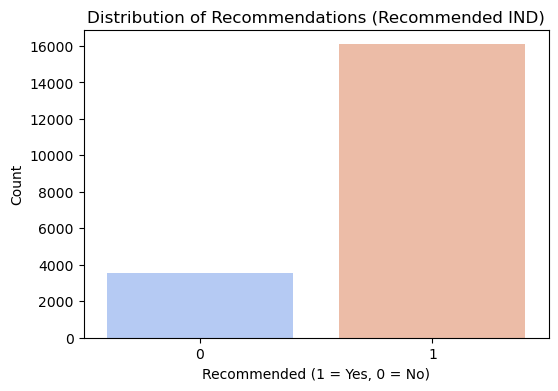

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


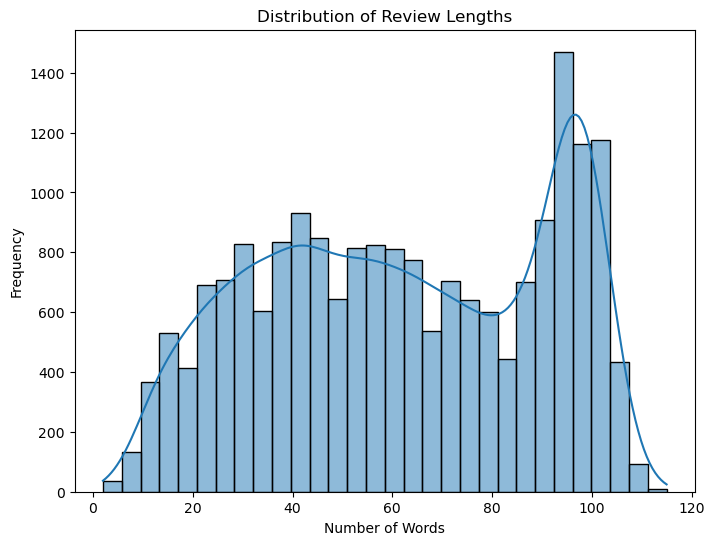

In [5]:
# Class Imbalance (Recommended IND)
print("\nClass Distribution of 'Recommended IND':")
print(clothing['Recommended IND'].value_counts())

# Missing values check
print("\nMissing Data in Each Column:")
print(clothing.isnull().sum())

# Distribution of 'Recommended IND'
plt.figure(figsize=(6, 4))
sns.countplot(data=clothing, x='Recommended IND', palette='coolwarm')
plt.title('Distribution of Recommendations (Recommended IND)')
plt.xlabel('Recommended (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# Distribution of review lengths
plt.figure(figsize=(8, 6))
sns.histplot(clothing['Review Length'], bins=30, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


#### Class Imbalance:

After checking the distribution of the Recommended IND column (1 = Recommended, 0 = Not Recommended) to see if the data is skewed towards one class. A balanced dataset is crucial for building accurate models. However there is a imbalance in class. One class of recommended reviews dominates, it could skew model predictions, making it biased towards the more frequent class.

#### Long Reviews (Outliers):

Similarly, we identified very long reviews (more than 100 words) as potential outliers. These reviews could dominate the analysis, so it's important to examine them, while reviewing the dataset. 
Extremely long reviews could distort the distribution of the dataset and might require special handling.

#### Noisy Data:
Very short reviews are unlikely to contain meaningful information, and long reviews could be outliers. Both cases can affect the quality of the analysis.

#### Missing values : 
There are no nulls/missing values in the data.

### Analytical Insights: 
- **Sentiment Analysis**: The *Review Text* combined with *Recommended IND* can be used to predict whether a customer would recommend a *product*.
-  **Demographic Analysis**: The *Age* of the reviewer allows for age-specific analysis to see how different *age groups* respond to products.
-  **Feedback and Product Improvement**: By analyzing *Positive Feedback Count*, businesses can prioritize addressing common issues in products or further enhancing products that are well-received.


# 1.2 Pre-processing data
Performing the required text pre-processing steps.

In [6]:
# Preprocessing function that includes all steps
def preprocess_review(review, rare_words, most_common_words):
    # Break the reviews into individual words and make everything lowercase
    tokens = tokenize(review)
    
    # Removing words that are less than 2 characters long (they're usually not useful)
    tokens = [token for token in tokens if len(token) > 1]
    
    # Taking out common stopwords like "the" and "is" since they don't add much meaning
    tokens = [token for token in tokens if token not in stopwords]
    
    # Excluding words that only show up once in the entire dataset
    tokens = [token for token in tokens if token not in rare_words]
    
    # Getting rid of the top 20 most frequent words, as they can impact the analysis by providing emphasis on them due to frequency. 
    tokens = [token for token in tokens if token not in most_common_words]
    
    return tokens


### Tokenization
- Tokenizes the review text using the regular expression specified in the task to examine how many tokens (words) are extracted.
 
*Each review is broken down into individual words (tokens) using a predefined regular expression. This ensures consistency and allows to handle word variations such as hyphenated words(-) and apostrophes(,).*

In [7]:
# Define regex for tokenization
# We use the given regular expression to tokenize the reviews. This regex handles words and hyphenated words.
token_pattern = r"[a-zA-Z]+(?:[-'][a-zA-Z]+)?"

# Function to tokenize the review text using the provided regex pattern
def tokenize(text):
    return re.findall(token_pattern, text.lower())

# Apply tokenization
# For each review in the dataset, we tokenize the 'Review Text' and store the tokens in a new column 'tokens'
clothing['tokens'] = clothing['Review Text'].apply(tokenize)
print("\nStep 4: Tokenization completed (First 5 tokenized reviews):")
print(clothing[['Review Text', 'tokens']].head())


Step 4: Tokenization completed (First 5 tokenized reviews):
                                         Review Text  \
0  I had such high hopes for this dress and reall...   
1  I love, love, love this jumpsuit. it's fun, fl...   
2  This shirt is very flattering to all due to th...   
3  I love tracy reese dresses, but this one is no...   
4  I aded this in my basket at hte last mintue to...   

                                              tokens  
0  [i, had, such, high, hopes, for, this, dress, ...  
1  [i, love, love, love, this, jumpsuit, it's, fu...  
2  [this, shirt, is, very, flattering, to, all, d...  
3  [i, love, tracy, reese, dresses, but, this, on...  
4  [i, aded, this, in, my, basket, at, hte, last,...  


- The above code correctly captures the words, hyphenated phrases, and words with apostrophes.
-  All text is converted to lowercase during tokenization step 1 using text.lower() to ensure consistency throughout.

### Rare and Frequent Words Removal:

- **Rare words**: Words that appear only once across the entire dataset are removed, as they generally do not provide much value in classification tasks and can add unnecessary noise.
- **Frequent words**: The top 20 most frequent words are also removed, as they are tend to be overly common and less informative.

In [8]:
# Step 5: Remove words that appear only once
all_tokens = [word for tokens in clothing['tokens'] for word in tokens]
word_freq = Counter(all_tokens)
#Identify rare words (words that appear only once in the dataset)
rare_words = {word for word, count in word_freq.items() if count == 1}
print(f"\nStep 5: Rare words identified (Total rare words: {len(rare_words)})")



Step 5: Rare words identified (Total rare words: 6755)


In [9]:
# Remove the top 20 most frequent words
most_common_words = [word for word, count in word_freq.most_common(20)]
print(f"\nStep 6: Top 20 most frequent words identified: {most_common_words}")




Step 6: Top 20 most frequent words identified: ['the', 'i', 'and', 'a', 'it', 'is', 'this', 'to', 'in', 'but', 'on', 'for', 'of', 'with', 'was', 'so', 'my', 'dress', 'not', 'that']


*The top 20 most frequent words : These words, although common, don't help distinguish between different reviews or contribute meaningfully to classification tasks, so removing them helps focus on more informative tokens.*

### Length Filtering: 
Words shorter than two characters are excluded, as they are not likely to add value in understanding the reviews.

In [10]:
# Removing words shorter than 2 characters
clothing['tokens'] = clothing['tokens'].apply(lambda x: [word for word in x if len(word) > 1])
print("\nStep 5: Remove Words Shorter Than 2 Characters")
print(clothing[['Review Text', 'tokens']].head())

## The condition len(token) > 1 ensures that any word shorter than 2 characters is removed.
## For example, if a token is "a" or "I", it will be excluded from the processed review.


Step 5: Remove Words Shorter Than 2 Characters
                                         Review Text  \
0  I had such high hopes for this dress and reall...   
1  I love, love, love this jumpsuit. it's fun, fl...   
2  This shirt is very flattering to all due to th...   
3  I love tracy reese dresses, but this one is no...   
4  I aded this in my basket at hte last mintue to...   

                                              tokens  
0  [had, such, high, hopes, for, this, dress, and...  
1  [love, love, love, this, jumpsuit, it's, fun, ...  
2  [this, shirt, is, very, flattering, to, all, d...  
3  [love, tracy, reese, dresses, but, this, one, ...  
4  [aded, this, in, my, basket, at, hte, last, mi...  


### Stopword Removal
- We remove common words (like "the", "is", "in") that do not carry much meaningful information for the task.

*The provided stopwords list in the assignment folder is used to identify these words.*

In [11]:
all_tokens_before = [token for tokens in clothing['tokens'] for token in tokens]

# Count the frequency of each word using Counter (before stopword removal)
word_freq_before = Counter(all_tokens_before)

# Display the 10 most common words in the dataset before stopword removal
most_common_words_before = word_freq_before.most_common(10)
print("\nMost Common Words in the Dataset (Before Stopword Removal):")
for word, freq in most_common_words_before:
    print(f"'{word}': {freq} times")


Most Common Words in the Dataset (Before Stopword Removal):
'the': 68632 times
'and': 43871 times
'it': 38285 times
'is': 27497 times
'this': 23001 times
'to': 21865 times
'in': 18533 times
'but': 14738 times
'on': 13717 times
'for': 12499 times


**These words appear frequently across the dataset but don't carry enough unique meaning to contribute to the analysis.**

In [12]:
# Remove stopwords using stopwords_en.txt
with open('stopwords_en.txt', 'r') as file:
    stopwords = set(file.read().split())
clothing['tokens'] = clothing['tokens'].apply(lambda x: [word for word in x if word not in stopwords])

all_tokens_after = [token for tokens in clothing['tokens'] for token in tokens]

# Count the frequency of each word using Counter (after stopword removal)
word_freq_after = Counter(all_tokens_after)

# Display the 10 most common words in the dataset after stopword removal
most_common_words_after = word_freq_after.most_common(10)
print("\nMost Common Words in the Dataset (After Stopword Removal):")
for word, freq in most_common_words_after:
    print(f"'{word}': {freq} times")




Most Common Words in the Dataset (After Stopword Removal):
'dress': 9334 times
'size': 7860 times
'love': 7722 times
'fit': 6582 times
'top': 6542 times
'wear': 5715 times
'great': 5302 times
'fabric': 4306 times
'color': 4099 times
'small': 4097 times


### Applying the full pre-processing pipeline using preprocess_review function defined above

In [13]:
# Applying the full pre-processing pipeline to each review using the preprocess_review function
clothing['Processed Review'] = clothing['Review Text'].apply(lambda review: ' '.join(preprocess_review(review, rare_words, most_common_words)))
print("\nStep 9: Preprocessing completed for all reviews")

# Display the first 5 rows without truncation
print("\nFirst 5 processed reviews:")
print(clothing[['Review Text', 'Processed Review']].head())


Step 9: Preprocessing completed for all reviews

First 5 processed reviews:
                                         Review Text  \
0  I had such high hopes for this dress and reall...   
1  I love, love, love this jumpsuit. it's fun, fl...   
2  This shirt is very flattering to all due to th...   
3  I love tracy reese dresses, but this one is no...   
4  I aded this in my basket at hte last mintue to...   

                                    Processed Review  
0  high hopes wanted work initially ordered petit...  
1  love love love jumpsuit fun flirty fabulous ti...  
2  shirt flattering due adjustable front tie perf...  
3  love tracy reese dresses petite feet tall wear...  
4  basket hte person store pick teh color pale ht...  


## Saving required outputs


In [14]:
clothing.to_csv('processed.csv', index=False)
print("\nStep 10: Processed data saved to 'processed.csv'")



Step 10: Processed data saved to 'processed.csv'


-> **Ouput saved**

*Processed Reviews: A cleaned version of each review is saved in processed.csv, where all the pre-processing steps have been completed.*

#### Vocabulary Creation
- After pre-processing, a vocabulary of unique words from the cleaned reviews is generated.
- Each word is assigned an index, and the vocabulary is saved in a format that will be used in subsequent tasks.

In [15]:

vocab = sorted(set([word for tokens in clothing['Processed Review'].apply(str.split) for word in tokens]))
vocab_dict = {word: idx for idx, word in enumerate(vocab)}

with open('vocab.txt', 'w') as vocab_file:
    for word, idx in vocab_dict.items():
        vocab_file.write(f"{word}:{idx}\n")
print("\nStep 11: Vocabulary saved to 'vocab.txt'")



Step 11: Vocabulary saved to 'vocab.txt'


-> **Ouput saved**
#### Vocabulary 
*A list of all unique words, sorted alphabetically and assigned a unique index, is saved in vocab.txt.*
*This vocabulary will be crucial for converting text data into feature vectors for machine learning models in task 2 and task 3.*

## Summary

 **Task 1** was an important foundational step in cleaning and organizing the text data, setting the base for more complex natural language processing tasks in task 2 and 3.

## References
1. https://www.kaggle.com/datasets/nicapotato/womens-ecommerce-clothing-reviews